In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("/content/drive/MyDrive/stroke-dataset.csv")

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.shape

(5110, 12)

In [8]:
columns = list(df.columns)

In [9]:
print(columns)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [10]:
columns = columns[1:]

In [11]:
print(columns)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


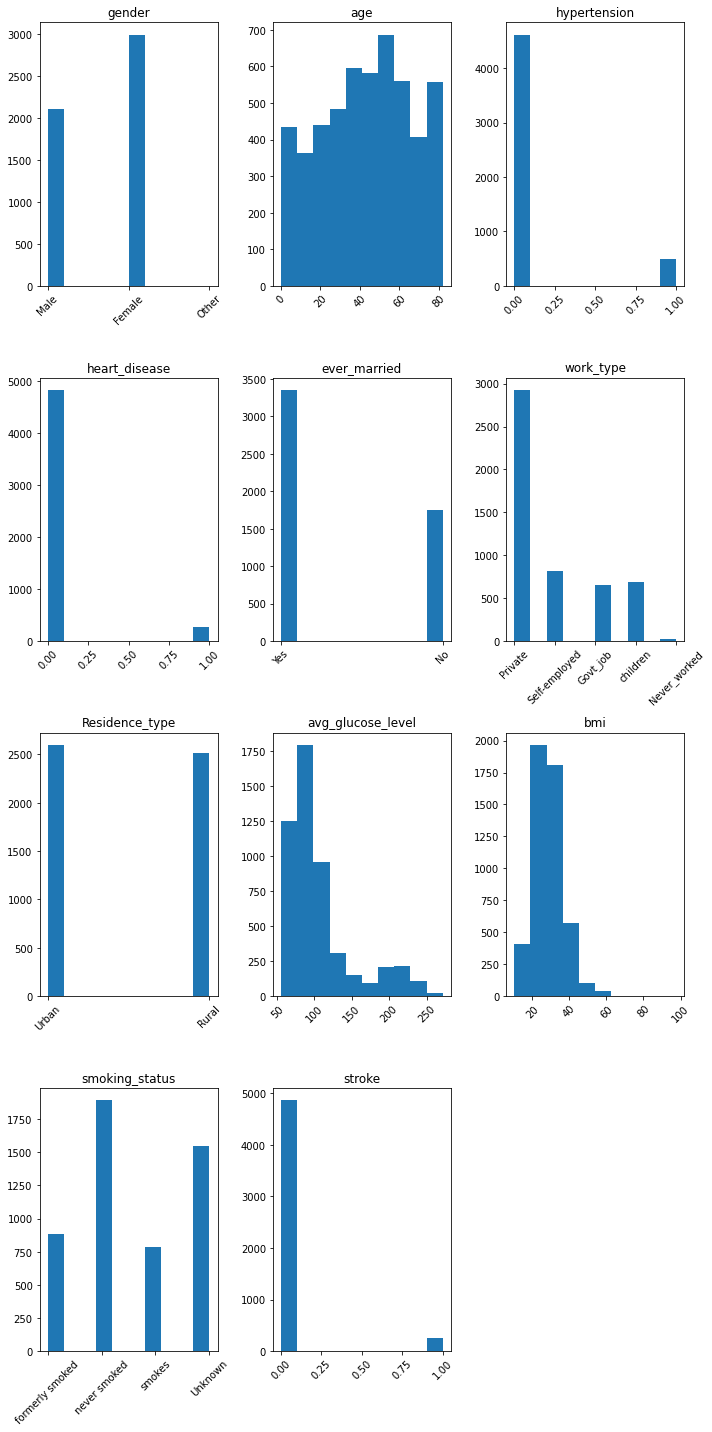

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))

for i in range(len(columns)):
  plt.subplot(4,3,i+1)
  plt.title(columns[i])
  plt.xticks(rotation=45)
  plt.hist(df[columns[i]])

plt.tight_layout()

In [13]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
mean_bmi = df['bmi'].mean()
df['bmi']=df['bmi'].fillna(mean_bmi)

In [16]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
from sklearn import preprocessing 
lb = preprocessing.LabelEncoder()

df['gender']= lb.fit_transform(df['gender'])
df['ever_married']= lb.fit_transform(df['ever_married'])
df['work_type']= lb.fit_transform(df['work_type'])
df['Residence_type']= lb.fit_transform(df['Residence_type'])
df['smoking_status']= lb.fit_transform(df['smoking_status'])


In [18]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [19]:
df.drop('id',axis=1,inplace=True)

In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [21]:
X = df.drop("stroke" , axis = 1).values
y = df["stroke"]


In [22]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_ovsmp, y_ovsmp = oversample.fit_resample(X, y)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train , y_test = train_test_split(X_ovsmp,y_ovsmp, test_size=0.25)

In [25]:
compare = pd.DataFrame(columns = ['RF', 'KNN', 'LG'], index = range(5))

**Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics


In [27]:
random_forest = RandomForestClassifier(n_estimators=350)
random_forest.fit(X_train,y_train)
predicted_val = random_forest.predict(X_test)

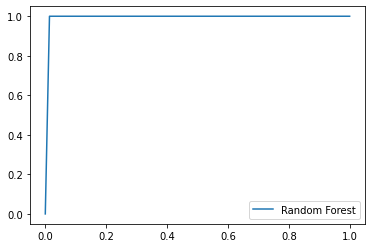

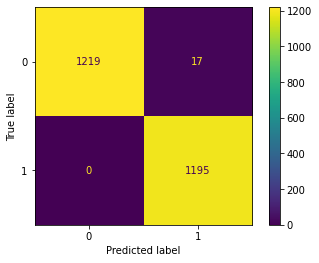

Accuracy: 0.993006993006993
Sensitivity: 1.0
Specificity: 0.9862459546925566
f1_score: 0.9929372663066058
AUC:  0.9931229773462783


In [28]:
acc_score = accuracy_score(y_test,predicted_val)
cm = confusion_matrix(y_test,predicted_val)
sen = cm[1,1]/(cm[1,0]+cm[1,1])
spe = cm[0,0]/(cm[0,0]+cm[0,1])
pre = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1_score = (2*pre*recall)/(pre+recall)
#tpr = true positive rate = sensitivity
#fpr = false positive rate
tpr=sen
fpr=1-spe

fpr1, tpr1, _ = metrics.roc_curve(y_test, predicted_val)
auc_score = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,label="Random Forest")
plt.legend()
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()
compare.iloc[0, 0] = round(acc_score, 2)
compare.iloc[1, 0] = round(sen, 2)
compare.iloc[2, 0] = round(spe, 2)
compare.iloc[3, 0] = round(f1_score, 3)
compare.iloc[4, 0] = round(auc_score, 3)
print("Accuracy: {}".format(acc_score))
print("Sensitivity: {}".format(sen))
print("Specificity: {}".format(spe))
print("f1_score: {}".format(f1_score))
print("AUC:  {}".format(auc_score))

**KNN**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)




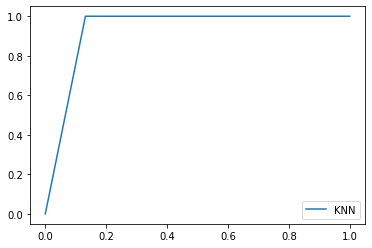

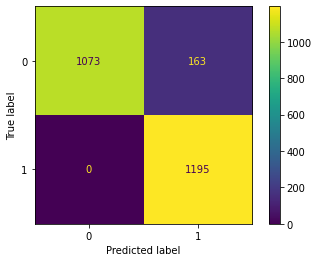

Accuracy: 0.9329494035376388
Sensitivity: 1.0
Specificity: 0.8681229773462783
f1_score: 0.936153544849197
AUC:  0.9340614886731391


In [30]:
acc_score = accuracy_score(y_test,y_pred)
cm2 = confusion_matrix(y_test,y_pred)
sen = cm2[1,1]/(cm2[1,0]+cm2[1,1])
spe = cm2[0,0]/(cm2[0,0]+cm2[0,1])
pre = cm2[1,1]/(cm2[1,1]+cm2[0,1])
recall = cm2[1,1]/(cm2[1,1]+cm2[1,0])
f1_score = (2*pre*recall)/(pre+recall)
#tpr = true positive rate = sensitivity
#fpr = false positive rate
tpr=sen
fpr=1-spe
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred)
auc_score = auc(fpr2,tpr2)
plt.plot(fpr2,tpr2,label="KNN")
plt.legend()
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2)
cm_display.plot()
plt.show()
compare.iloc[0, 1] = round(acc_score, 2)
compare.iloc[1, 1] = round(sen, 2)
compare.iloc[2, 1] = round(spe, 2)
compare.iloc[3, 1] = round(f1_score, 3)
compare.iloc[4, 1] = round(auc_score, 3)
print("Accuracy: {}".format(acc_score))
print("Sensitivity: {}".format(sen))
print("Specificity: {}".format(spe))
print("f1_score: {}".format(f1_score))
print("AUC:  {}".format(auc_score))

**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression(max_iter=1000)
lg.fit(X_train,y_train)
y_pred_lg = lg.predict(X_test)

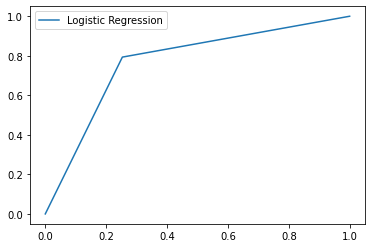

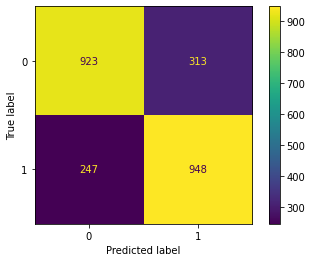

Accuracy: 0.769642122583299
Sensitivity: 0.793305439330544
Specificity: 0.7467637540453075
f1_score: 0.771986970684039
AUC:  0.7700345966879257


In [32]:
acc_score = accuracy_score(y_test,y_pred_lg)
cm3 = confusion_matrix(y_test,y_pred_lg)
sen = cm3[1,1]/(cm3[1,0]+cm3[1,1])
spe = cm3[0,0]/(cm3[0,0]+cm3[0,1])
pre = cm3[1,1]/(cm3[1,1]+cm3[0,1])
recall = cm3[1,1]/(cm3[1,1]+cm3[1,0])
f1_score = (2*pre*recall)/(pre+recall)
#tpr = true positive rate = sensitivity
#fpr = false positive rate
tpr=sen
fpr=1-spe
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_lg)
auc_score = auc(fpr3,tpr3)
plt.plot(fpr3,tpr3,label="Logistic Regression")
plt.legend()
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm3)
cm_display.plot()
plt.show()
compare.iloc[0, 2] = round(acc_score, 2)
compare.iloc[1, 2] = round(sen, 2)
compare.iloc[2, 2] = round(spe, 2)
compare.iloc[3, 2] = round(f1_score, 3)
compare.iloc[4, 2] = round(auc_score, 3)
print("Accuracy: {}".format(acc_score))
print("Sensitivity: {}".format(sen))
print("Specificity: {}".format(spe))
print("f1_score: {}".format(f1_score))
print("AUC:  {}".format(auc_score))

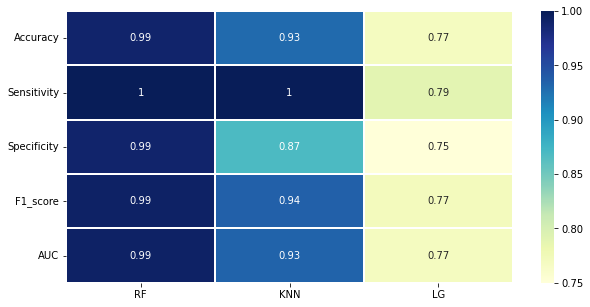

In [33]:
import seaborn as sns

plt.figure(figsize = (10,5))
sns.heatmap(compare[compare.columns.to_list()].astype(float), cmap = 'YlGnBu', annot = True, linewidths = 1, cbar = True, annot_kws = {'fontsize': 10},
           yticklabels = ['Accuracy', 'Sensitivity', 'Specificity', 'F1_score','AUC'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.show()

